# <center> Gun-Violence in US- A Statistical Overview </center>

In [1]:
import pandas as pd
import numpy as np
import datetime
from wordcloud import WordCloud
import seaborn as sb
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen 
from urllib.error import HTTPError
from urllib.error import URLError
from bs4 import BeautifulSoup

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import seaborn as sb
%matplotlib inline

In [4]:
df=pd.read_csv("stage3.csv",parse_dates=['date'],infer_datetime_format=True)

In [5]:
df['incident_characteristics']=df['incident_characteristics'].str.replace('|'," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace('/'," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace('('," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace(')'," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace('-'," ")
df['incident_characteristics']=df['incident_characteristics'].astype(str)

In [6]:
text=[]
for i in range(len(df)):
    text.append(df['incident_characteristics'][i])

In [7]:
with open("file.txt", "w") as output:
    output.write(str(text))

In [8]:
t=open('file.txt').read()

In [9]:
wordcloud = WordCloud().generate(t)

(-0.5, 399.5, 199.5, -0.5)

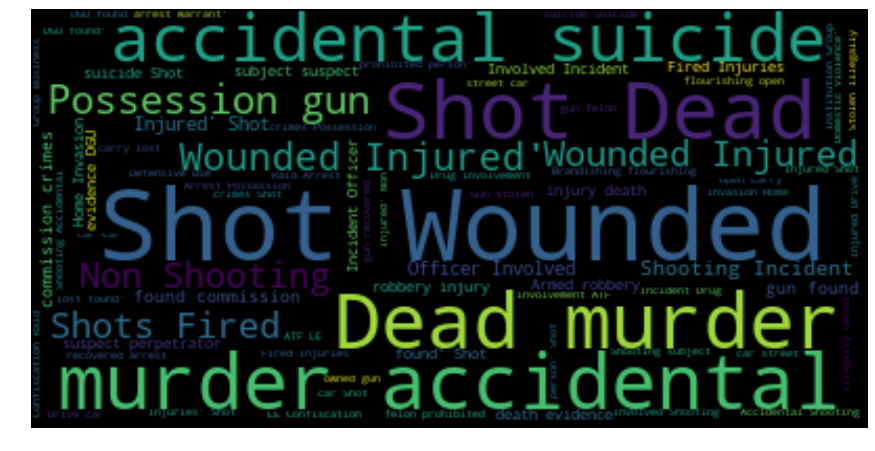

In [10]:
sb.set(rc={'figure.figsize':(15,10)})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

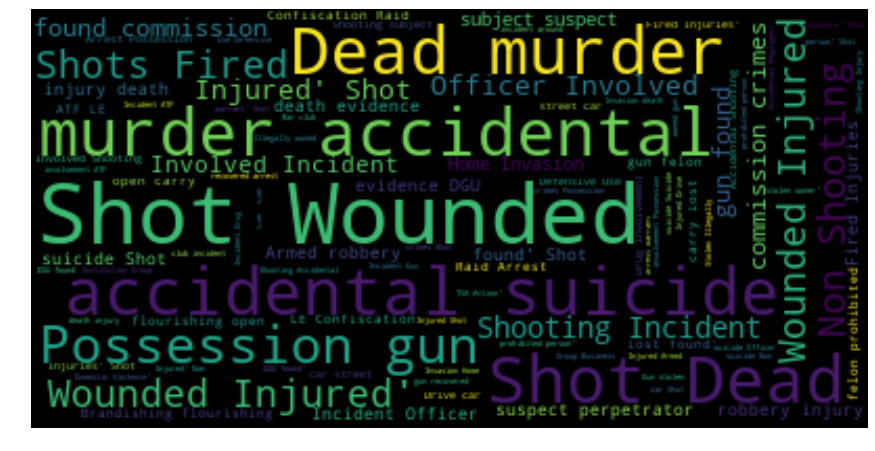

In [11]:
wordcloud = WordCloud(max_font_size=40).generate(t)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
def word_process(text):
    tok=word_tokenize(text)
    return [word for word in tok if not word in stopwords.words('english')]

In [14]:
df['Tokens']=df['incident_characteristics'].apply(word_process)

In [16]:
state=df.groupby(['state'])['n_killed','n_injured'].agg('count').reset_index()
state=state.sort_values('n_killed',ascending=False)

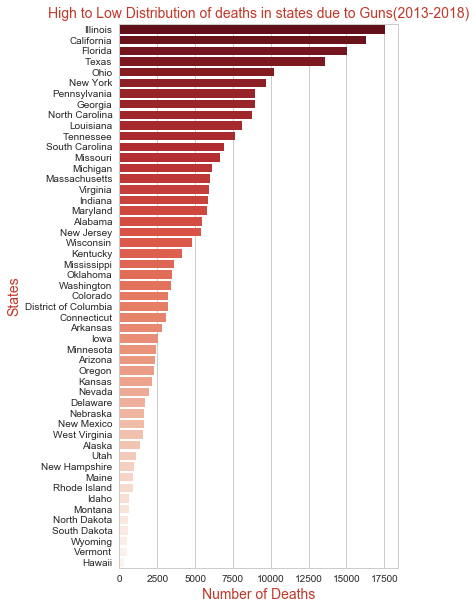

The state with the maximum number of deaths is Illinois with around 17556
On an average every state has almost 4699 deaths


In [17]:
sb.set(rc={'figure.figsize':(5,10)})
sb.set_style("whitegrid")
sb.barplot(x=state['n_killed'],y=state['state'],palette="Reds_r")
plt.xlabel("Number of Deaths",fontsize=14,color='#C0392B')
plt.ylabel("States",fontsize=14,color='#C0392B')
plt.title("High to Low Distribution of deaths in states due to Guns(2013-2018)",fontsize=14,color='#C0392B')
plt.show()
print("The state with the maximum number of deaths is Illinois with around",state['n_killed'].max())
print("On an average every state has almost",int(state['n_killed'].mean()),"deaths")

In [37]:
df['incident_characteristics']=df['incident_characteristics'].str.lower()

In [72]:
df['mass-shooting']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('mass shooting')))
df['suicide']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('suicide')))
df['drug']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('drug')))
df['domestic violence']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('domestic violence')))
df['felon']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('felon')))

In [89]:
df['incident_characteristics'][239647]

'shots fired   no injuries  domestic violence'

In [94]:
df=df.drop(['incident_id','incident_url','source_url','incident_url_fields_missing','sources',
 'state_house_district',
 'state_senate_district'],axis=1)

In [96]:
#Incidents because of mass-shooting
mass=df[['date','state','city_or_county','n_killed','n_injured','mass-shooting']]

Text(0.5,1,'Mass Shootings in every state')

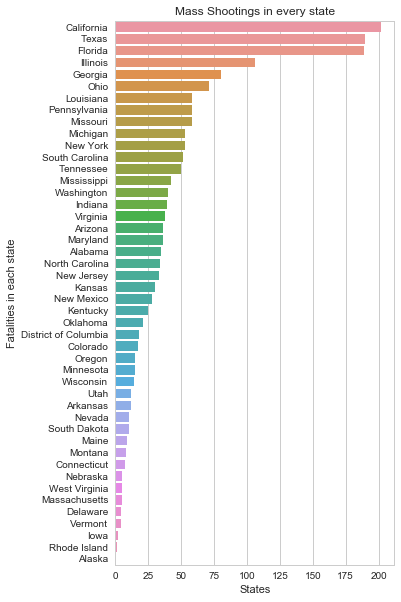

In [169]:
mass=mass[mass['mass-shooting']==True]
x=mass.groupby(['state'])[['n_killed']].sum().reset_index()
x2=mass.groupby(['state','city_or_county'])[['n_killed']].sum().reset_index()
x_mass=x.sort_values(['n_killed'],ascending=False)
x2_mass=x2.sort_values(['n_killed'],ascending=False)
sb.set(rc={'figure.figsize':((5,10))})
sb.set_style("whitegrid")
sb.barplot(x_mass['n_killed'],x_mass['state'])
plt.xlabel("States")
plt.ylabel("Fatalities in each state")
plt.title("Mass Shootings in every state")

In [150]:
mass_shooting_deaths=sum(x2['n_killed'])
deaths=sum(df['n_killed'])
print("Total number of deaths caused by mass-shooting incidents =",sum(x['n_killed']))
print("Total number of deaths caused by gun related incidents =",sum(df['n_killed']))
print("Percentage of deaths caused by mass-shootings",(mass_shooting_deaths/deaths)*100,"%")

Total number of deaths caused by mass-shooting incidents = 1829
Total number of deaths caused by gun related incidents = 60468
Percentage of deaths caused by mass-shootings 3.02474035854 %


In [152]:
states=pd.read_csv("states.csv")

In [163]:
new_df1=pd.merge(x,states, how='left',left_on=['state'],right_on=['State']).dropna()
new_df1=new_df1.drop(['Rank','State'],axis=1)
new_df1=new_df1.sort_values(['n_killed'],ascending=False)

In [164]:
new_df1['PerDeaths']=(new_df1['n_killed']/new_df1['Population'])*100

In [182]:
#States with the most number of mass-shootings/killing incidents
new_df2=mass.groupby(['state'])["n_killed"].count().reset_index().sort_values(['n_killed'],ascending=False)

In [183]:
new_df2['percentincidents']=(new_df2['n_killed']/len(mass))*100

In [184]:
new_df2

,state,n_killed,percentincidents
4,California,194,11.850947
11,Illinois,151,9.224191
9,Florida,116,7.086133
39,Texas,97,5.925473
29,New York,78,4.764814
10,Georgia,69,4.215027
34,Pennsylvania,65,3.970678
16,Louisiana,63,3.848503
38,Tennessee,62,3.787416
31,Ohio,62,3.787416


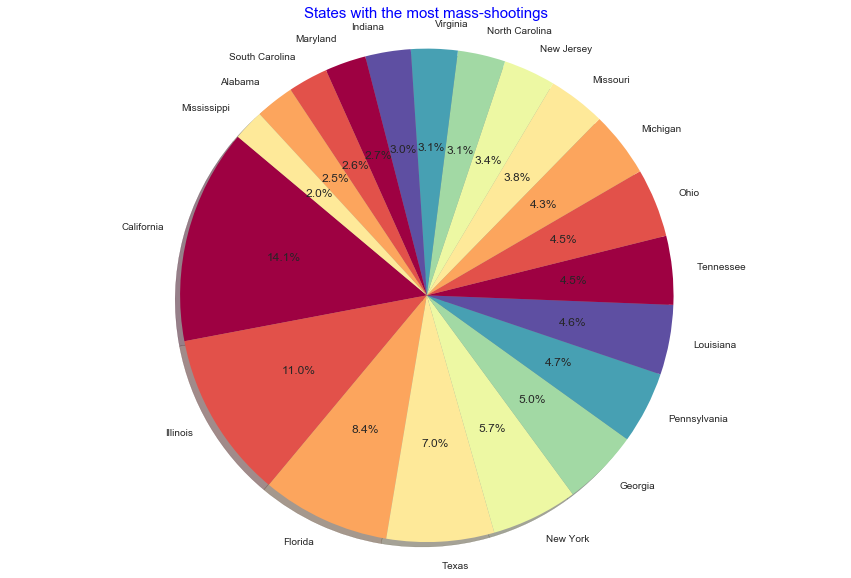

In [196]:
sb.set(rc={'figure.figsize':((15,10))})
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.pie(new_df2['n_killed'][0:20], labels=new_df2['state'][0:20],
        autopct='%1.1f%%', shadow=True, startangle=140,colors=colors)
plt.axis('equal')
plt.title("States with the most mass-shootings",fontsize=15,color="Blue")
plt.show()

In [200]:
#A deeper look at these incidents-people who mostly get affected, the reason behind it and if there is
#a way to overcome it

subset1=df[df['mass-shooting']==True]

In [527]:
null_values1 =pd.DataFrame(df.isnull().sum()).reset_index()
null_values1.rename(columns={'index': 'RowNames', 0: 'Blank RowCount'},inplace=True)
null_values1['Precent Blank Values']=(null_values1['Blank RowCount']/len(df))*100
null_values1=null_values1.sort_values(['Precent Blank Values'],ascending=False)
null_values1.head()

,RowNames,Blank RowCount,Precent Blank Values
27,participant5-age,237733,99.188908
32,participant5_gender,235096,98.088678
26,participant4-age,234540,97.856699
31,participant4_gender,227548,94.939439
25,participant3-age,225396,94.041564


In [419]:
df=df.drop(['participant_relationship','location_description','participant_name'],axis=1)

Cleaning the dataset

In [208]:
#Filling the blanks to get to better results, for the number of guns involved use the median

In [283]:
df['n_guns_involved'][df['n_guns_involved'].isnull()]=df['n_guns_involved'].median()

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [284]:
df['participant_age']=df['participant_age'].str.replace("|"," ")

In [483]:
df['participant1-age']=df['participant_age'].str[3:5]
df['participant2-age']=df['participant_age'].str[10:12]
df['participant3-age']=df['participant_age'].str[17:19]
df['participant4-age']=df['participant_age'].str[24:26]
df['participant5-age']=df['participant_age'].str[31:33]

In [484]:
df['participant1-age']=df['participant1-age'].str.replace(":","")
df['participant1-age']=df['participant1-age'].str.replace("'","")
#df['participant1-age']=df['participant1-age'].str.replace(" ","NaN")

In [363]:
df['participant1-age'][df['participant1-age']==""]=18

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [456]:
df['participant_type'][200][-19:]

'19::Subject-Suspect'

In [466]:
df=df.drop(['address','congressional_district'],axis=1)

In [469]:
df=df.drop(['latitude','longitude'],axis=1)

In [476]:
np.nan

nan

In [491]:
df['participant1-age'][df['participant1-age']==""]=np.nan
df['participant2-age'][df['participant2-age']==""]=np.nan
df['participant3-age'][df['participant3-age']==""]=np.nan
df['participant4-age'][df['participant4-age']==""]=np.nan
df['participant5-age'][df['participant5-age']==""]=np.nan

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Isha\Anaconda

In [486]:
median_age=df['participant1-age'][df['participant1-age'].isnull()==False].astype(int).median()

In [487]:
df['participant1-age'][df['participant1-age'].isnull()==True]=median_age

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Trying to find the total number of participants involved in a crime

In [494]:
df=df.drop(['total-participants'],axis=1)

In [543]:
df['participant1_gender']=df['participant_gender'].str.split("|",expand=True)[0].str[3:4]
df['participant2_gender']=df['participant_gender'].str.split("|",expand=True)[2].str[3:4]
df['participant3_gender']=df['participant_gender'].str.split("|",expand=True)[4].str[3:4]
df['participant4_gender']=df['participant_gender'].str.split("|",expand=True)[6].str[3:4]
df['participant5_gender']=df['participant_gender'].str.split("|",expand=True)[8].str[3:4]

In [562]:
df['participant1_type']=df['participant_type'].str.split("|",expand=True)[0].str[-7:]
df['participant2_type']=df['participant_type'].str.split("|",expand=True)[2].str[-7:]
df['participant3_type']=df['participant_type'].str.split("|",expand=True)[4].str[-7:]
df['participant4_type']=df['participant_type'].str.split("|",expand=True)[6].str[-7:]
df['participant5_type']=df['participant_type'].str.split("|",expand=True)[8].str[-7:]

In [568]:
df['participant1_type']=df['participant1_type'].str.replace(":","")
df['participant2_type']=df['participant2_type'].str.replace(":","")
df['participant3_type']=df['participant3_type'].str.replace(":","")
df['participant4_type']=df['participant4_type'].str.replace(":","")
df['participant5_type']=df['participant5_type'].str.replace(":","")

In [572]:
import plotly
plotly.__version__


'2.2.2'

In [573]:
import plotly.plotly as py
import plotly.graph_objs as go

In [591]:
x3=df.groupby(['state'])[['n_killed','n_injured']].agg(sum).reset_index()
x3=x3.sort_values(['n_killed','n_injured'],ascending=False)
x3.head()

,state,n_killed,n_injured
4,California,5562,7644
43,Texas,5046,6106
9,Florida,3909,7072
13,Illinois,3409,13514
35,Ohio,2508,5703


In [645]:
trace0 = go.Scatter(
    x = x3['state'],
    y = x3['n_killed'],
    mode = 'lines+markers',
    name = 'People-killed'
    ,
    fill='tozerox'
)
trace1 = go.Scatter(
    x = x3['state'],
    y = x3['n_injured'],
    mode = 'lines+markers',
    name = 'People-injured'

)
trace2 = go.Scatter(
    x = x3['state'],
    y = x3['n_killed']+x3['n_injured'],
    mode = 'lines+markers',
    name = 'People-affected'
)

layout = go.Layout(    title='plot-title',
    xaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='States',
        range=[1,50],
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=True
    ),
    yaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='People affected by Gun-Violence',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='inside',
        zeroline=True
    ),
)

data=[trace0,trace1,trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename= 'shaded_lines')

In [602]:
x4=df.groupby(['city_or_county'])[['n_killed','n_injured']].agg('sum').reset_index().sort_values(['n_killed','n_injured'],ascending=False)
x4.head()

,city_or_county,n_killed,n_injured
2019,Chicago,2104,10427
5303,Houston,1145,1255
530,Baltimore,1055,2427
10152,Saint Louis,919,1783
9018,Philadelphia,901,2326


In [646]:
trace0 = go.Scatter(
    x = x4['city_or_county'],
    y = x4['n_killed'],
    mode = 'lines+markers',
    name = 'People-killed'
    ,
    fill='tozerox'
)
trace1 = go.Scatter(
    x = x4['city_or_county'],
    y = x4['n_injured'],
    mode = 'lines+markers',
    name = 'People-injured'

)
trace2 = go.Scatter(
    x = x4['city_or_county'],
    y = x4['n_killed']+x4['n_injured'],
    mode = 'lines+markers',
    name = 'People-affected'
)

layout = go.Layout(    title='plot-title',
    xaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='City',
        range=[1,50],
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=True
    ),
    yaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='People affected by Gun-Violence',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='inside',
        zeroline=True
    ),
)

data=[trace0,trace1,trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename= 'shaded_lines')

The draw time for this plot will be slow for clients without much RAM.


C:\Users\Isha\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [624]:
totalguns=df['n_guns_involved'].sum()
x5=df.groupby(['state'])['n_guns_involved'].agg(sum).reset_index()
x5['PercentofGuns']=(x5['n_guns_involved']/totalguns)*100
x5=x5.sort_values(['PercentofGuns'],ascending=False)
x5.head()

,state,n_guns_involved,PercentofGuns
4,California,23695.0,8.117423
13,Illinois,19621.0,6.721753
9,Florida,19214.0,6.582324
43,Texas,15782.0,5.406591
35,Ohio,12553.0,4.300401


In [628]:
trace = go.Pie(labels=x5['state'], values=x5['PercentofGuns'],
               hoverinfo='label', textinfo='value', 
               textfont=dict(size=20),
               marker=dict( 
                           line=dict(color='#000000', width=2)))
py.iplot([trace], filename='styled_pie_chart',)

Text(0.5,1,'Percentage Distribution of Guns')

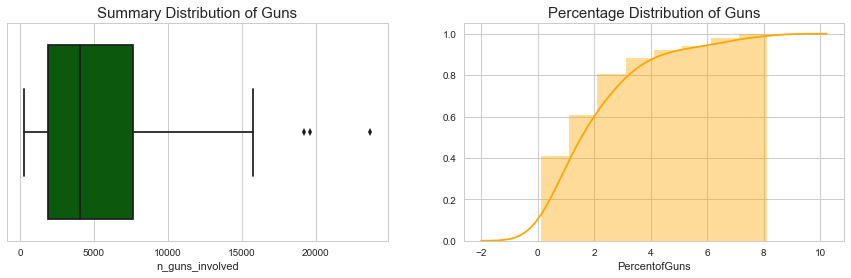

In [651]:
sb.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,4))
sb.boxplot(x5['n_guns_involved'],color='DarkGreen',ax=ax1)
ax1.set_title("Summary Distribution of Guns",fontsize=15)
plt.xlabel("Number of Guns involved")
sb.distplot(x5.PercentofGuns,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True),color='Orange',ax=ax2)
ax2.set_title("Percentage Distribution of Guns",fontsize=15)

In [672]:
import decimal

In [661]:
women=len(df[(df['participant1_gender']=='F') & (df['participant1_type']=='Suspect')])+len(df[(df['participant2_gender']=='F') & (df['participant2_type']=='Suspect')])+len(df[(df['participant3_gender']=='F') & (df['participant3_type']=='Suspect')])+len(df[(df['participant4_gender']=='F') & (df['participant4_type']=='Suspect')])+len(df[(df['participant5_gender']=='F') & (df['participant5_type']=='Suspect')])
men=len(df[(df['participant1_gender']=='M') & (df['participant1_type']=='Suspect')])+len(df[(df['participant2_gender']=='M') & (df['participant2_type']=='Suspect')])+len(df[(df['participant3_gender']=='M') & (df['participant3_type']=='Suspect')])+len(df[(df['participant4_gender']=='M') & (df['participant4_type']=='Suspect')])+len(df[(df['participant5_gender']=='M') & (df['participant5_type']=='Suspect')])

In [673]:
x6={'Gender':['men','women'],
    'Suspects':[men,women],
     'Percent-Suspects':[round((men/total)*100,2),round((women/total)*100,2)]}

In [674]:
x6

{'Gender': ['men', 'women'],
 'Percent-Suspects': [93.34, 6.66],
 'Suspects': [156804, 11192]}

Total incidents where the police had a suspect 167996
Total incidents where the police had a female suspect 11192
Total incidents where the police had a male suspect 156804


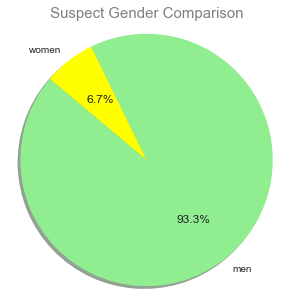

In [680]:
total=women+men
print("Total incidents where the police had a suspect",total)
print("Total incidents where the police had a female suspect",women)
print("Total incidents where the police had a male suspect",men)
x6={'Gender':['men','women'],
    'Suspects':[men,women],
     'Percent-Suspects':[round((men/total)*100,2),round((women/total)*100,2)]}
x6=pd.DataFrame(x6)
sb.set(rc={'figure.figsize':((5,5))})
colors = ['LightGreen','Yellow']
plt.pie(x6['Percent-Suspects'], labels=x6['Gender'],
        autopct='%1.1f%%', shadow=True, startangle=140,colors=colors)
plt.axis('equal')
plt.title("Suspect Gender Comparison",fontsize=15,color="Gray")
plt.show()

# Domestic Violence Abuse cases - Deepdive

In [707]:
abuse_female=len(df[((df['participant1_gender']=='F')&(df['participant1_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant2_gender']=='F')&(df['participant2_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant3_gender']=='F')&(df['participant3_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant4_gender']=='F')&(df['participant4_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant5_gender']=='F')&(df['participant5_type']=='Suspect')&(df['domestic violence']==True))])
totaldomestic=len(df['domestic violence']==True)
abuse_male=len(df[((df['participant1_gender']=='M')&(df['participant1_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant2_gender']=='M')&(df['participant2_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant3_gender']=='M')&(df['participant3_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant4_gender']=='M')&(df['participant4_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant5_gender']=='M')&(df['participant5_type']=='Suspect')&(df['domestic violence']==True))])
victim_female=len(df[((df['participant1_gender']=='F')&(df['participant1_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant2_gender']=='F')&(df['participant2_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant3_gender']=='F')&(df['participant3_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant4_gender']=='F')&(df['participant4_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant5_gender']=='F')&(df['participant5_type']=='Victim')&(df['domestic violence']==True))])
victim_male=len(df[((df['participant1_gender']=='M')&(df['participant1_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant2_gender']=='M')&(df['participant2_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant3_gender']=='M')&(df['participant3_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant4_gender']=='M')&(df['participant4_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant5_gender']=='M')&(df['participant5_type']=='Victim')&(df['domestic violence']==True))])

In [711]:
x7={'Gender':['Male','Female'],
     'DomesticAbuse-Suspects':[abuse_male,abuse_female],
     'PercentDomesticAbuse-Suspects':[round((abuse_male/(abuse_male+abuse_female))*100,2),round((abuse_female/(abuse_male+abuse_female))*100,2)],
      'TotalSuspects':[men,women],
       'DomesticAbuse-Victims':[victim_male,victim_female],
       'PercentDomesticAbuse-Victims':[round((victim_male/(victim_male+victim_female))*100,2),round((victim_female/(victim_male+victim_female))*100,2)]
   }
x7=pd.DataFrame(x7)
x7.head()

,DomesticAbuse-Suspects,DomesticAbuse-Victims,Gender,PercentDomesticAbuse-Suspects,PercentDomesticAbuse-Victims,TotalSuspects
0,8651,4473,Male,86.06,44.88,156804
1,1401,5493,Female,13.94,55.12,11192


Text(0.5,1,'Domestic Abuse Victims comparison between Men and Women')

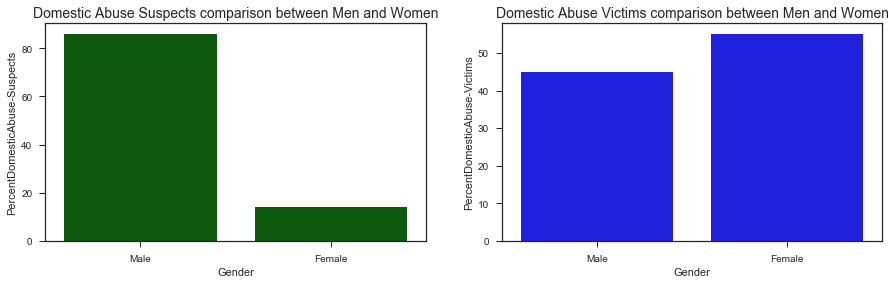

In [728]:
sb.set_style("ticks")
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,4))
sb.barplot(x7['Gender'],x7['PercentDomesticAbuse-Suspects'],color='DarkGreen',ax=ax1)
ax1.set_title("Domestic Abuse Suspects comparison between Men and Women",fontsize=14)
sb.barplot(x7['Gender'],
           x7['PercentDomesticAbuse-Victims'],color='Blue',ax=ax2)
ax2.set_title("Domestic Abuse Victims comparison between Men and Women",fontsize=14)

In [722]:
dom=df[df['domestic violence']==True]

In [726]:
state_dom=dom.groupby(['state'])[['n_killed','n_injured']].agg(sum).reset_index()
state_dom=state_dom.sort_values(['n_killed','n_injured'],ascending=False)
state_dom.head()

,state,n_killed,n_injured
43,Texas,731,330
9,Florida,501,322
4,California,374,182
35,Ohio,369,253
10,Georgia,354,186


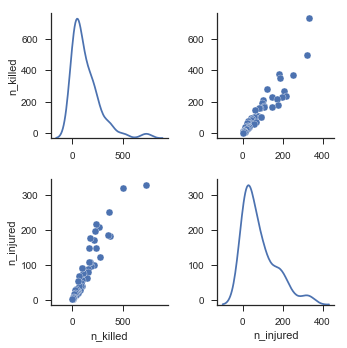

In [776]:
sb.pairplot(state_dom, palette="Set2", diag_kind="kde")

Text(0.5,1,'Top 20 states with the most fatalities because of domestic violence')

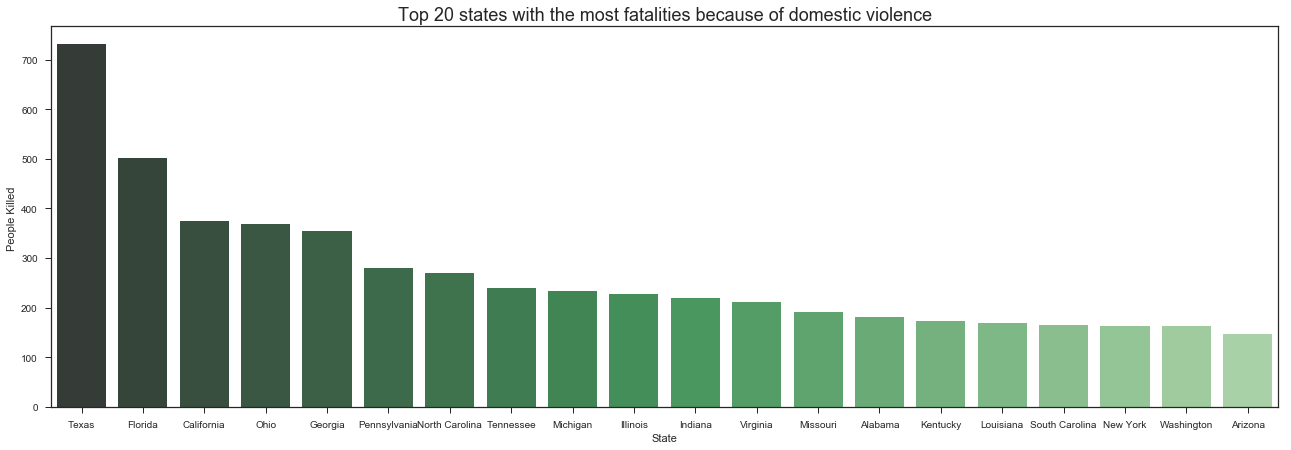

In [780]:
sb.set(rc={'figure.figsize':((22,7))})
sb.set_style("ticks")
sb.barplot(state_dom['state'][0:20],state_dom['n_killed'][0:20],palette="Greens_d")
plt.xlabel("State")
plt.ylabel("People Killed")
plt.title("Top 20 states with the most fatalities because of domestic violence",fontsize=18)

Text(0.5,1,'Top 20 states with the most injuries because of domestic violence')

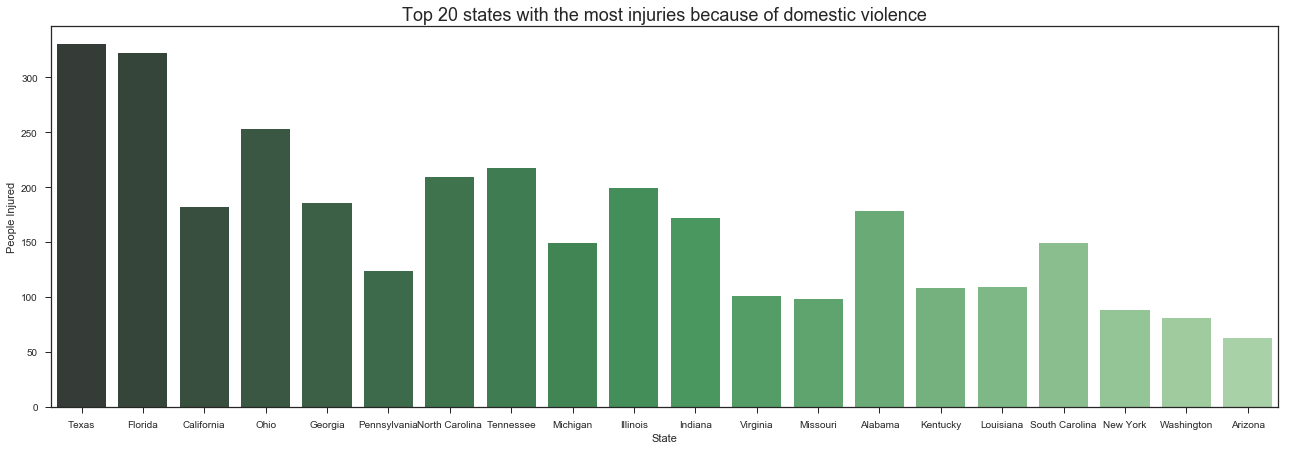

In [781]:
sb.set(rc={'figure.figsize':((22,7))})
sb.set_style("ticks")
sb.barplot(state_dom['state'][0:20],state_dom['n_injured'][0:20],palette="Greens_d")
plt.xlabel("State")
plt.ylabel("People Injured")
plt.title("Top 20 states with the most injuries because of domestic violence",fontsize=18)

In [790]:
dom['weapon']=dom['gun_type'].str.split("|",expand=True)[0].str[3:]

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [794]:
dom['weapon'][dom['weapon']=='Unknown']=np.nan

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Isha\Anaconda3\lib\site-packages\pandas\core\generic.py:5233: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Isha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [798]:
x8=dom[dom['weapon'].isnull()==False]

In [802]:
x8=x8.groupby(['weapon'])['n_killed','n_injured'].agg(sum).reset_index().sort_values(['n_killed'],ascending=False)

In [805]:
x8.head()

,weapon,n_killed,n_injured
22,Handgun,588,368
21,9mm,138,91
25,Shotgun,136,92
24,Rifle,123,68
3,22 LR,90,66


In [804]:
trace0 = go.Scatter(
    x = x8['weapon'],
    y = x8['n_killed'],
    mode = 'lines+markers',
    name = 'People-killed'
    ,
    fill='tozerox'
)
trace1 = go.Scatter(
    x = x8['weapon'],
    y = x8['n_injured'],
    mode = 'lines+markers',
    name = 'People-injured'

)
trace2 = go.Scatter(
    x = x8['weapon'],
    y = x8['n_killed']+x8['n_injured'],
    mode = 'lines+markers',
    name = 'People-affected'
)

layout = go.Layout( title='Deaths and injuries caused by different type of guns',
    xaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='City',
        range=[1,50],
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=True
    ),
    yaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='People affected by Gun-Violence',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='inside',
        zeroline=True
    ),
)

data=[trace0,trace1,trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename= 'shaded_lines')

In [819]:
data=[]
indices=dom['notes'][dom['notes'].isnull()==False].index
for i in indices:
    print(dom['notes'][dom['notes'].isnull()==False][i])

Two firearms recovered. (Attempted) murder suicide - both succeeded in fulfilling an M/S and did not succeed, based on details.
Shotgun was murder weapon. Custody dispute over 3yo child not present. Brittney was five months pregnant.
ms; 1 inj, 6 killed, including shooter. Incident started at perps home and ended at Santa Monica College. Domestic dispute believed to have triggered the event.
dv; 4 inj; non life-threatening injuries. Perp surrenders after man hunt. Perp charged.
Address #1 as shown above, address #2 is 141 Galleria Drive, Desoto, TXu
Perpetrator laid in wait to kill victims; actions result of his perception that he was being denied time with his newborn child.
suspect shot exGF in her home
Child shot and killed father in domestic violence incident
Son killed father during argument.
Corpus Christi police investigating this
Disturbance involving man with gun. Police talked down and disarmed him. Numerous charges including poss. firearm while intoxicated.
Boy shot and kill

Man threatens mother of his children with a gun, on the street.
Woman is in custody after allegedly shooting her live-in boyfriend
Couple shot during domestic dispute.
Armed man, domestic violence suspect, fatally shot by Pueblo police.
Gunfire exchanged between suspect and police.
began as argument over shoes, led to police chase in cj vehicle with gf; shots fired at Officers, per died in jail March 2015
Man arrested on warrant. 248 grams of synthetic marijuana called Spice, drug paraphernalia, controlled substances and two handguns.
Murder suicide. Victim murdered his father, 81 year old Peter Rossi and Adele Frieda Piazza, 79 by blunt force trauma. When confronted by police victim shot himself.
Teen shot by grandfather during argument. 
shot stepfather during domestic violence on mother
hit her with butt of gun multiple times 
word of gun on Sandra Day O'Connor High School;
33.712764, -112.145979;
RELOAD 1
Man found with gunshot wound, dead. 48 yr old woman in custody, not called a 

1fv, shot estranged gf mother in back, attempted to shoot gf in head, gun jammed, arrested in NYC
Man's wife and son charged in his shooting death.
Man broke into former g/f apt with weapons, laid in wait for her.
Man Allegedly Shoots Brother in Liberty Co.
m/s
Man shoots daughter, tries to shoot wife
Man shoots at car with buddy's g/f and son in it. No injuries.;
43.088625, -83.716161
Southwest Atlanta, Fulton County assistant district attorney shot, among two shot inside a car, no indication that the shooting is related to McConnell's job, prosecutor's estranged husband found dead of a self-inflicted shot at a nearby cemetery.
Riverwood Plantation home in 
Pinchbeck squeezed the trigger twice, but the gun malfunctioned. 
Standoff with authorities.
1fv 1mp dom vi
Stone Mountain, man and woman killed in a murder suicide.
Shooting stems from argument between children.
Murder/suicide. Unknown who shooter was at this time.
in Valley Village 
Murder suicide.
University City suburb; woman i

dom father shot son
Police find man and woman shot dead, apparent murder-suicide
Murder/Suicide
Charter Oak neighborhood/section of Los Angeles County
Man shot by police w/bean bag rounds after armed standoff. Slightly wounded.
Perry County off Highway 28, man killed in standoff
Thorntons in Shively, woman shot by man who then turned the gun on himself
dom father shot son
Missing woman found shot, killed; found 6/9/14. 2 children under 7 also missing. Husband charged w/ murder. Children still missing 5/5/15
Source does not specify an exact incident date.
Lonsdale Homes, domestic argument became violent, suspect shot by police 
man pointed a gun at a man's face and crashed his pickup while trying to run people over following a fight with family members 
Man shot in hand, woman pistol-whipped - domestic
Domestic call leads to drug, cash and gun arrest of felon.;
39.102494, -84.631876
man pointed gun at another man's head when friends brought his girlfriend home to her apartment after nig

Ft. Worth police are investigating this shooting that resulted from a domestic dispute.
Attempted murder/suicide leaves shooter still alive.
1 male shot - wounded
west of Hollywood Rd., near the St. Joseph-Stevensville border in Royalton Township
boy fatally shot his grandfather after the man shot his son at mobile home
1 male victim shot - killed
Wife shoots and kills husband
Rockwood Cancer Treatment Center in Deaconess Hospital. Picked up gun from police the day prior that had been confiscated for suicide attempt May 16.
man shot his estranged wife who later died
Days Inn Motel between Lamar and Getwell, 1 dead, 1 injured in love triangle shootout
Murder/Suicide
1 victim shot - wounded, 1 victim shot - killed
dom 1fvk stepfather shot stepdaughter
man's body found in his home with gunshot wounds; 33.758781, -79.666875
Roxborough section/neighborhood of Philadelphia; Man barricades self in apartment for short time before fleeing into wooded area - detainment status unknown
m/s h/w
One

man shoots girlfriend and steals car; Corpus Christi police investigating
Sam Hill killed Allen Hill. Roberta Hill accidentally shot Dep Reed
Woman fired shots at boyfriend
Detroit Police Officer's mistress shot in struggle w/ wife and officer over wife's gun, on husband's boat.
Richmond Police lieutenant and his wife got in an argument at their home which ended with her pointing a .22 pistol at him
shot at girlfriend from car; bullet went into house, where man located; grazed female's head; no other injuries
1 male victim, shot - killed
shot at girlfriend's tires to keep her from leaving
Domestic abuse situation with knife. Perpetrator shot and killed by police officer.
Father shoots son in altercation
north Charlotte, family argument ended with one man being shot 
Man holds police at bay with assault rifle before surrendering.
a former Dane County deputy recently diagnosed with ALS apparently shot wife, her sister, then himself. He survived.
threatened with gun; was wrestled away; no

man shot estranged wife
police shot armed man who fired a shot at officers during standoff, at birthday celebration suspect had assaulted mother of his child who was hiding behind a vehicle
Teen girl shot by her boyfriend
Perpetrator shot his ex-wife in a domestic dispute.
man shot his estranged wife to death in the driveway
Teen has surgery to remove 2 pellets in his leg, after being shot by his stepfather.
Marquis Place Apt; shot gf once in chest; also strangled
man shot his wife;
37.556020, -81.197774
David Askew shot Patrica Askew and then himself
Victim was found shot to death in a burning minivan. Source indicates that the shooting may have occurred at the couple's Springfield apartment.
Man brandishes handgun at woman in domestic dispute.
man shoots and kills wife; then kills himself;
31.603582, -89.804447
Felon sought for shooting g/f in back; shooter pleads guilty, 59 years, both incidents;
Man points gun at g/f, standoff ensues for 5 hours; surrender, no injuries.;
42.387443,

Man pulls gun and points it at g/f's face.
Mother, off-duty decorated 24 yr veteran officer critical; daughter shot, wounded by daughter's b/f; in custody; pleaded guilty, 37 yrs. 2/6/17;
47.139853, -122.089517
Man shoots into woman's door, seriously wounding her in front of children; someone inside fires at 1st shooter's car, it crashes; developing.
Man fires shotgun at ex and her new man when she picks up her things. Woman seriously injured.
Copper Beech Townhomes, Building 2100; Early shot gf Greene, then self; USC students
New Holland; shot live-in gf; grazed head
boyfriend and girlfriend shot each other during domestic incident 
2 injured in domestic-related shooting. Suspect in custody.; 41.955255, -87.808024
suspect found with a self inflicted gunshot wound during domestic disturbance
Man fires gun through window in personal dispute, then chases victim w/ truck, shooting at him as he ran.
man shot at a residence, domestic-related, may have been in self defense
Perpetrator pointe

Man shoots g/f at address, then goes to his mother's in 7500 block of Elmhurst, shoots her. Both stable.
shot ex-wife outside home
Bethany Moorings area; died 01/06/15
Victim shot killed by off duty officer in domestic incident
physical altercation, waved shotgun at spouse, no shots fired
Step father critically wounds step-son.
Man shoots, kills woman, himself.
Houston police are investigating
Amarillo police investigating case of man assaulting wife and firing gun at cops when they arrive
Man intentionally shoots his wife. Critical. Man charged.
pointed shotgun at female after driving recklessly and burning Christmas presents
1 brother killed, 1 wounded; 3rd brother charged, held w/o bail; found not guilty on all charges, 10/28/16
Riverbluff Mobile Home Park - Man brandishes gun at home of ex-g/f
Lubbock police investigating
Female shot killed
choked vic and threatened with rifle, domestic assault, no gun-related injuries
shot stepfather, found tied to truck, rifle found in bedroom;
3

kidnapped ex-gf in Cuyler Jan 28, assaulted thru standoff with handgun, shotgun, knife, vic escaped when perp took pills, suicide, found 1/29, init Carpenter Rd
pistol whip drugs
Suspect in domestic call fires on officers w/o warning, wounding 1, then on others. Officers wound suspect. Taken off life-support 2/7/15
Surry County, man who assaulted with bat and fired shots during break-in at his ex-girlfriends home later found shot
Sherwood Towers apartment building Bought gun two days before.
HI perp is exboyfriend with bat, he is shot
brandished handgun, shot 3 times
ois shots fired by police and perp, no imjuries
firefighter shot woman inside of home and staged crime scene, Glock 9mm semi-automatic handgun
Glock handgun
1 f vic inj, shot in leg with S&W chrome 40 cal, Fulton ordered Nieman to shoot girlfriend as part of Grape Street Crip gang initiation
Woodview Estate Apartments - Woman shot, face, killed in parking lot, by ex b/f w/ shotgun
kidnapped ex-gf, 29yo vic on Bellevue, dro

shot and attempted to kill wife, possession of firearm by convicted felon
f shot husband
Officers answering robbery call confronted by man pointing shotgun at them; Officers shot 11 times, hit victim twice in chest.
18 yr old male shoots father during an argument
Ex-bf (Perp 1)shoots ex-gf (Vic 1), then current bf (Perp 2) of ex-gf (Vic 1) shoots ex-bf (Perp 1)
drove back from GA to SC, pw father, held him & wife hostage at gunpoint with loaded handgun, threatened to kill if cops called, no shots fired
Man found w/ assault weapons in city limits after domestic incident.
Hunters Landing subdivision, boyfriend shot girlfriend, then self in home;
34.151071, -84.923380
result of fight, brandished rifle, 9yo girl present
Domestic home invasion ends in death for ex-b/f. Self-defense.
shot in apt building hallway, ex-bf shot mother of children
shots fired when man barricaded himself in a home with a woman, police standoff for 13 hours
wife kills husband
father shot son with .22 cal revolver, 

Woman's ex b/f shoots several bullets, pistol whips man and new/b/f, flees. No injuries, car hit by bullet, shell casings found.
held 3 people hostage during standoff, no shots fired, peaceful surrender
man charged after reporting his girlfriend pulled a gun on him
Ex-husband shoots wife and her boyfriend; Houston police investigating.
Ridgewood, shot wife and stepdaughter, barricaded self in home, perp hanged self
man abducted his wife at gunpoint from Thaxton area of Bedford County to her mothers home on King Street in Vinton
shots fired into a dresser when father confronted his daughters boyfriend with a shotgun after hearing allegations he had assaulted her
Georgie's Girls strip club - Man puts gun to wife's head, wrecks her car, runs from police, spits on them, is captured.
Man shoots, kills, wife, her brother, in parking lot of her business. Shooter wounded by police who heard/saw him shooting.
Incident occurred sometime "In late April". Shots fired through window of residence. S

Man arguing w/ g/f brandishes gun repeatedly at neighbors trying to reason w/ him; surrendered to police
pw roommate with hi power rifle stock, roommate escaped, brief standoff with police, peaceful surrender, no shots fired
Fort Wadsworth, Von Briesen Park, excon bf shot gf, reported to police someone else did it
man shot his grandmother
Suicide behind Marathon station
Woman shot her father twice within 9 hours over 2 days at same Caswell County home, she was found shot on Rockingham County road after second incident
Woman who shot her father twice within 9 hours over 2 days at same Caswell County home found shot on Rockingham County road after second incident, he shot back
shot in head, relative by marriage
Campus East neighborhood near Virginia Wesleyan College, man killed his wife and shot another man before shooting at police
Anderson Co, intoxicated perp fired handgun at family member, address not disclosed
Mahopac, ex bf broke into home, ex gf got gun away from him and shot him,

slashed ex husband's tires and shot in leg
shot wife in neck with handgun, result of argument
recently broke up, vic found in parent's home, 6/10 perp killed self in KS after multi state chase with 243 cal rifle, note found in VT
off Louisville Road, man shot and killed woman who took out protective order against him inside her home, shot himself next day after police shootout
between Chadbourn and Cerro Gordo, man shot by his wife
Victim killed by man involved with woman; several witnesses; suspect convicted 4/21/16; sentenced to 60 years;
Man disarmed by family of 1 gun, by police of several more,after domestic struggle. Alcohol involved
shot gf in face while she tried to break up, she was told to report as accident, held hostage during 3 hr standoff, no shots fired, turned self in 6/16
threat female family member with 9mm handgun, carrying conceal without license, did not threat ofc
office park parking lot, argument over car, shootout between uncle and niece's ex-fiancee, perp uncle

Man w/ known mental issues charged w/ killing his cousin, uncle, uncle's friend; neighbor heard shots on 7/14/15; life in prison, 5/26/16
Man holding wife in home at gunpoint. Firearm not recovered.
mother shot son with handgun
Man shot/killed wife, mother-in-law, and self.
Armed off-duty officer broke into gf's residence during domestic dispute.
Felon causes standoff, flees; police find 3 rifles, shotgun, loaded handgun, magazines, boxes/ ammunition; made silencers in workshop; fed. charges;
bro shot sis at parent's
near Glenwood Avenue on city’s West Side, woman shot her boyfriend during domestic dispute
woman fired gun at her husband
1 killed; there were extenuating circumstances behind the shooting and the grand jury did not indict the victim's daughter for the shooting.
drunk and mad because his wife would not have sex with him. 5-10 guns recovered.
threat family over food with revolver, no inj
fired shotgun into car, threat gf and 8mo old child, no inj, peaceful surrender, overni

Mother and child were in car outside of home, when child found gun, and thinking it was a toy, fired it.
Man beating g/f puts gun in her mouth, pulls trigger; unloaded;
Reported gunfire inside residence.
domestic dispute outside residence, shot in head
Perp shot by police after firing at them and threatening his daughter and wife with a rifle after assaulting them.
Russell Prater area, wife shot and killed by her husband before he killed himself
police officer responding to domestic disturbance between mother and her son shot him when he approached officer with knife
husband fired shotgun at his wife outside their home
Victims 41yo girlfriend arrested on attempted murder, aggravated assault with a deadly weapon and injury to the elderly
Two fights occur at residence between four men in which one person is ultimately shot.
broke into bro home, violated protective order, threat with pistol, no shots fired
physically assaulted girlfriend, held gun to her head in apt
Shot fired after argum

Man, woman, found dead in apartment; children unharmed; M/S
physical assault, threat wife with rifle, self with pistol, no shots fired, peaceful surrender
Rolling shootout with police over several streets. Address is originating call.
man shot his niece's boyfriend while trying to get him to leave a home
Man commits suicide after police respond to domestic incident;
deputies seized seven firearms, stolen ATV, drugs and cash at house while investigating domestic situation, one pistol and one sawed-off shotgun stolen
Suspect told police his wife fought with him, and he attempted to leave; said he heard wife slam shotgun to ground, and it went off during struggle.
Owner of Emporium Gift Shop killed in front of next door ice cream shop by Ex, who then suicides
man shot his wife during argument at home
Wife killed by husband in murder-suicide, 12-gauge shotgun
Woman shoots, injures her 15 y/o son, commits suicide;
Revenge killings. 1 victim was to be witness at perp's upcoming trial. 2 foun

shot father's fiancee with 22 cal rifle in sleep
threat wife and stepson with 380 cal, no shots fired
Man shoots, kills his mother, g/f while using bath salts, with gun he stole from his mother;
Police responding to DV incident. Entered home, man lunged at officer who fatally shot him.
Teen shot mother's live-in boyfriend.
woman shoots at ex- boyfriend, domestic assault
dv, shots fired into car, no inj
Apt 1, threat preg ex girlfriend with Marlin 22 cal rifle during fight, accidentally discharge, no inj
Four Seasons employee shot, killed outside restaurant in domestic triangle incident; suspect in custody; charged with murder. Trial set for 1/2016.
Victim defends herself against physically abusive boyfriend by threatening to use handgun if he came any closer to her.
Man fires more than 50 rounds inside, during intoxicated domestic incident; 2 children present; SWAT, 3 hr. standoff, surrender;
woman shot and killed her brother after tractor dispute
Male shot, wounded his wife during an 

man shot his father-in-law
Man stabbed by g/f's ex shoots him; stable;
Perp broke in and shot ex-wife's boyfriend dead, then killed himself (hanging).
3 female victims shot and killed, 1 male victim shot and wounded, 1 female victim kidnapped
Police responding to DV call; perp brandished shotgun at officers. 45 minute standoff; no shots fired.

30.219944, -92.099061
shot special needs son then self in parking lot, failed m/s
son's friend shot during bungled burglary and murder plot against his father
Gwinnett Co, husband shot wife
Man found shot multiple times, killed, in his home; wife charged, arrested, 4/15/16; pleaded guilty 11/7/16; facing 20-60 yrs.
deputy hit when shots fired during domestic call
Man w/ multiple domestic violence violations found in possession of 2 guns, marijuana; unlawful poss/ serious violent felon;
Man shot, killed, woman injured, by male shooter outside bar; in custody; murder chg cleared; convicted, tampering/ evidence;
Perp tried to shoot victim with rifl

dv, woman shot man in foot
man kills 14 yr old niece over shoes
Sentenced to 28 years in prison
2 killed. Husband of victim and husband's friend kill victim and the man with whom she was having an affair.
Woman wounder, her brother critical, after her ex-husband invaded her home and shot them;
Fox Meadows, ex-husband shot and killed after slashing ex-wife's tires in her driveway
threat girlfriend with handgun
off Mouse Creek Road, former firefighter shot his girlfriend, her son and family dog to death in their home
Man shot and injured girlfriend
Midtown, U-Med Dist, ex wife shot ex husband with 40 cal
Woman called friends to protect/help her leave her abusive bf. Friends beat bf, then bf and friends engaged in rolling gun battle across city.
deputies shot and killed suspect in driveway with firearm who came toward them during domestic disturbance call
[also reported as Ottawa] man who had beaten up and raped woman in Sharples area of Logan County shot by her boyfriend
man shot his gir

mini spree, fired on woman in dv driveby, poss killed Wesley Wayne Stewart (beaten, unclear death cause), set house on fire, shot self off Neal Gap, same day
called in by stepdaughter, man threat wife with handgun, poss intox
Man angry about breakup shot/killed mother of ex-gf, after shooting/killing the family dog.
Shots fired during argument b/t sister and brother. Armed standoff with responding police; pointed gun at own head then at police who shot/killed suspect.
home on Lake Lucille, altercation with ex girlfriend
Man fires shots at car with his pregnant g/f, her sister, in it; no injury; suspect in custody;
threat girlfriend with handgun, no shots fired
arrest at different site from reported shooting site
1 killed, DV call. Man held gf hostage, threatened her, pointed rifle at officers after 4 hour standoff. Officers shot/killed suspect. 3yo child safely removed
Suspect threatened to kill her, brandished handgun, punched her eye repeatedly. Suspect arrested after unrelated shoot

+++NOTE+++ Mass Shooting based on numerical threshold and standard definition.
Standoff after domestic violence call
Victim fatally shot by father during domestic argument; vic was on active duty U.S. Air Force.
2 inj dv kidnapping. Police standoff. Man shoots gf and then self. Both critical.
shot sister, found in field near home
shot livein boyfriend, found 2/22
Husband, wife, slain by son; son commits suicide;
Man broke into ex-gf's house, fired handgun at responding police. Suspect shot/killed self after standoff with officers. Officer's holster hit by bullet.
1 inj.
escalated argument, perp physically assault vic, struggle over handgun, vic shot perp
physically and verbally assault female vic, shot female, then self outside with stolen large cal handgun, vic init ID by witness
DV call; man threatening, assaulting his father. Confronted officers with machete, led chase and drove at officers. Suspect shot/killed.
couple arguing, traveling Rte 1, gun fired in car, unclear if purposefu

physical assault ex girlfriend, as leaving in truck, fired shots at house and verbal threat
Bauer shot by Officers, not Mike during hostage situation. Mike tried to shoot himself in head but gun jammed, repeatedly told officers he was ready to die.
intox perp threat parents and self, 3 hr standoff end early 3/25 AM, peaceful surrender
Larkgrove Estate subdivision, woman shot dead by boyfriend, later high speed chase through four counties until he wrecked his vehicle at 40 mile marker on I-65
After suspect in domestic standoff surrenders, officers find gun, active meth lab;
2 killed. This story is developing.
physical assault girlfriend, held against will, fired shots out window with rifle
Relative alerts police to murder/suicide;
attempt m/s, dv, eviction attempt, tenant Pham shot sis Ann and landlord/bro-in-law, then self
High Point area, man shot his wife and step-son then shot himself when deputies arrived (child with them unhurt), pistol, shotgun and semi-automatic handgun
respond 

Woman grazed, shoulder, when man arguing w/ her pulls gun, shoots at her;
Mayfair area -- Father shot son in self defense as dispute escalated.
Repeatedly stabbed long-time girlfriend, brandished gun at officers, child present, no inj, local schools on soft lockdown. Suspect shot/killed by officers.
man stabbed and shot after he returned to woman's house and attacked her again while deputies were obtaining warrants for his arrest in earlier domestic assault
officers shot man when he opened fire on them and shot his mother as she attempted to run away after they served Emergency Custody Order, .9 mm handgun
shots fired at man by estranged boyfriend of woman he had been dating, pistol
Hwy 68, woman shot by boyfriend as she got out of vehicle and ran
Hickory Hill, woman kidnapped by her ex-boyfriend during home invasion robbery, shotgun
3 killed. Double murder-suicide. Man kills his parents and then himself.
dv, menacing, found walking on road
Jewett Elementary placed on a "soft" lockdown

20 month old child shot/killed by father during a domestic dispute
ex cop shot his 2 children then self with 45 cal pistol
East Lake area, man shot in domestic incident
man held gun to his girlfriend's head and threatened to kill her then pulled trigger twice and later fired shots inside home
Orange Co, SWAT standoff after ex on Yucatan, ex boss on 2nd St
Mother's BF arrested 4 shooting 11mo old & older child w/ BBs. Older child required hand surgery to remove BB. Mother arrested for failure 2 report felony
Man shot/inj. female roommate
shots fired into relative's car window, result of fight after basketball game at picnic
Domestic violence. Suspect takes gun from girlfriend who was then a deputy with the Webb County Sheriff's Office. He then took her to a restroom & locked door.
shot girlfriend then self, found by vic adult son
shot daughter, stab male friend
Rogers Park - man killed in shots fired by 2 armed women fighting over him;
Man confesses to shooting, killing woman;
man fired

3 inj. Domestic violence.
threat girlfriend with handgun, male Good Sam shot, Sgt Kerry Carville shot perp multiple times, unspec multiple handguns recover
threat girlfriend with handgun, brief chase for block, threat officers with bag believed to have handgun, scales found, gun not init retrieved
unspec domestic dispute
3 killed. Double murder-suicide. Domestic violence. Man shoots wife and stepdaughter and then himself.
1 inj. Domestic violence.
Man shot, killed, on his birthday; g/f held, charged;
2 inj. Domestic violence. Uncle and nephew shoot each other.
Bodies discovered 7/6/16
Chest wound;
42.608844, -83.265366;
RELOAD 1
1 inj. Shooting follows argument. Brother shoots brother. Domestic violence.
5 killed. Murder-suicide. Man kills wife, his 3 children & himself. Domestic violence. Others killed on Torrey Pines Drive.
Man charged w/ killing his mother during fight w/ his pregnant g/f;
gunshot wound to her lower right abdomen
2 men pull guns on woman; drag her into car;
near Bus

Brothers. Victim tried to wrestle gun from suspect.
near Summit, fired shots at girlfriend as she ran from him, only physical assault inj
Boone Co, dv, threat with gun during argument
1 killed. 1 inj. DV, OIS. Evidence indicates that f vic was shot by suspect, not by the police; under investigation.
1 injured in this shooting, killed in drive by 8/3; suspects in custody; Curtis, Goens, Cook II, plead guilty, weapons; McKennelly II, invol. mansl./ weapons;
intox suspect threat woman then shot self with rifle
Suspect was shot after chasing wife with knives.
shot with 40 cal, suspect also poss armed with another handgun, SKS rifle, shotgun. Suspect broke window in ex-gf's apt., fired at ex and man inside killing man
near Arroyo Grande Blvd and Warm Springs, man shot wife, confess on 911, handgun recover. Suspect claims mercy killing/sick wife.
woman trying to leave husband, shot in leg, led to standoff, shots exchanged with officers through door, no inj during standoff, AR15, 9mm handgun


wife arrest on conspiracy
1 killed. Domestic violence.
ALT: US Hwy 192, near Shady Lane, Seminole Co Deputy shot girlfriend then self behind bldg
1 inj. ois. Perp attacks victim with knife and is shot by police
dv, wrestling with girlfriend over gun, inj on girlfriend unclear if gun related, aunt removed children with no issue, stolen 38 cal, 40 cal seized
shot in chest during fight with spouse
result of argument between family
dv, vic age 30s, handgun seized
near Loop 1604, locked mother out of house, shots heard, unspec hostage situation, no inj report, peaceful surrender
Call to DV incident led to perp with knife stabbing officer in face; partner shot suspect (in critical condition).
Man shot wife in murder/suicide
hi, threat girlfriend and best friend with loaded 9mm pistol, male vic struggle with suspect, call 911 on self
Man set his car on fire, carrying Russia 7.62 rifle; son talked him into surrendering gun to LE, Ithaca .22-cal and Savage 7 mag rifles seized too; mental eva
of

1 inj. Mother shoots daughter. Domestic violence.
2 inj. Domestic violence. Theft of a firearm.
40.647452, -75.403873
shot wife, physical assault; died in hosp; husband pleaded to felonious assault; 5 years;
Domestic violence. 9 hour standoff with police.
threat with gun in argument, unspec dv
respond to dv, suspect under influence of alcohol and drugs armed with knives, holding knives to his children's throats. shot by Cpl Ryan Piotrowski
hi, violate PO, physical assault, fire pistol at vic, hit porch, ricochet and hit vic leg
stole pills, gun from parents, fired gun at father, graze head
dv threat with gun
1 killed, ois. Perp w/ assault rifle refuses to drop it at command. Nonlethal rounds fail. Domestic violence. Salvatore Reale & Andrew McRae officers involved.
threat girlfriend, brief chase, threw gun in neighbor's lawn
Man arrested as police stood by as person moved out of house; found w/ heroin, gun; armed violence, agg. unlawful use/ weapon;
threat mother with handgun during ar

Escambia Co, shot in stomach by mother;
30.937338, -87.063120
Greenville Co, husband shot wife, then self, husband DIED 9/29
Woman shot twice, killed, by her father;
41.450417, -81.870710
Square-off w/ guns between relatives leads to victim hit arm, groin; partial arm amputation, splenectomy, colostomy, genital damage; suspect convicted; 8 yrs;
Polk Co, shot stepfather in chest with pellet gun, drugs in home, bit by K9 resist arrest, 3 juveniles for drugs
shot wife then self
OIS. Suspect slashed/stabbed 3 children with a knife on 6200 block of Hazel Avenue, and 2 adults at Cobbs Creek Parkway and Webster Street.
near UMD, retired Army Lt Col shot wife at home, drove to college, shot son then self, found in car
respond to dv, Man attacked cop with knife, Officer Alyssa Shirey shot man after taser fail
1 inj. Teen shot mom with pellet gun following an argument. Domestic violence.;
33.018963, -96.618285
14yo opened fire in school yard after killing father. Suspect stopped by good Samarita

stem from earlier dv, shots fired from shotgun, gun jam, responding Officer Howard Smith shot intox suspect when threat
Court awarded custody to 2yo's father, grandmother opened fire during child handoff at Walmart parking lot; no inj to father; shot self in foot.
Collier Co, shot daughters then self, poss link to woman found stabbed in Miami apt prior day
Woman shot in head, body dumped in street, arrest in GA
Argument over tv; woman fired 6shots thru wall to uncle's bedroom.
Dom Viol call; felon in poss threatened family with gun; packaged heroin also found on scene
Man brandishes gun at ex g/f's workplace, commits suicide in alley; ex sheltered by 3 moving men inside truck; suspected in same day gun theft;
Woman fired shots at boyfriend's ex-gf. No inj.
Enka and Candler area, one shot during domestic incident; subject detained.
man fired shots at officers during standoff after domestic dusturbance
Sawed-off shotgun confiscated during domestic disturbance call
Walton Co, threat girlf

warning shot struck boyfriend
man shot and killed by his wife during argument. Other source has first name as "Sudon"
held ex wife against will, in laws came for her, ex grazed, father shot in leg
Granville County sheriff's deputy forced his way into estranged wife's before killing parent's residence. shot wife, then self. Drugs found at crime scene
threat family, fired shots with rifle, hit 1 vic multiple times, unclear if physical or gun related inj
Male subjects body was found at 100 black of Sprinkle Street
man visiting home of his current girlfriend shot father of her children after he severed home's electrical power and started banging on door
Initially reported AD; prosecutors later charged suspect with DV; woman 6mos pg.
respond to dv, chase intox suspect, threat with 9mm pistol, Officers Kevin Bender and Aaron Medina, Sgt Michael Falquez shot suspect
Snohomish Co, intox suspect shot wife and house damage with assault style rifle, semi auto pistol
Man shoots and kills mother of

Dispute w/brother in law; pw; suspect fired 2 shots which missed.
shot ex wife and male friend then self, attempt m/s, near midnight 11/30-12/1
suspect in custody
Fort Bend Co, wife shot husband
Incident date unspecified.;
38.530210, -90.273898
Date is arrest date. Unclear where vic was shot, body found in TN. Suspect arrested in Louisville, Ky
Brevard Co, dv, shot in arm, car on I95
near Claudette, physical assault by father of child, children’s mother and her sister assaulted, mother fatally shot him
Domestic violence. Husband and boyfriend of woman fight.
Father shot, killed by son, in custody; Warren Co.
fired shots at ex door, no inj
1 killed, 1 inj. ois. Jefferson Parish, respond to unspec dv, shots exchange, Dep inj in init shooting, suspect kill in manhunt. Drug involvement.
Arlington, attempt hi, threat ex girlfriend, new boyfriend shot ex
shot at 2 women in dv, no inj
LEO responded to DV call w/man threatening 2 in home w/gun; short standoff; no shots fired
shot by ex
under i

Mentally ill man stabbing family member w/scissors; LEO tried to subdue with bean bag guns before shooting w/service weapon
McDowell County, man shot dead following family-related dispute;
37.207990, -81.560134
Charges against Pedigo are TBD.
shot girlfriend, her father, then self
suspect's body found 1/15Willow Park in Lehi
Nassau Co, Long Island, fired shots in air with FEG PMK 380 handgun during fight with girlfriend
1 killed. Brother shot brother. Shooting followed argument.
daughter stab father, father shot daughter, escalated verbal altercation, father in police custody
Hillsborough Co, shot husband
Suspect shoots member of g/f's family, abdomen, at holiday party; family disarmed, held til officer arrived;
SHots fired during domestic argument; handgun, shotgun and drugs found in bedroom of 4yo child.
pointed loaded gun at family member while drunk
off Whitehouse Fork Road, son shot man armed with handgun who fired shots during argument with his mom, shotgun
shot wife, confess to 

1 killed domestic violence
called police, then shot wife then self
respond to dv, 2 inj, self inflict gunshot
Kidnapping. Brandishing. Domestic violence. Suspect beat woman and pointed a gun at her and prevented her from leaving. He later slashed her tires.
respond to dv, intox off-duty officer fire 2 shots through door, overnight standoff 1/16-1/17, no inj, peaceful surrender, multiple guns seized
Violated protection order. Led chase, brandished gun at officers who then shot/killed him.
Man AD'd into window as subj.tapped it on stepson's head and told him to vacate residence. No inj.
Woman found shot, killed; husband nearby, unconscious from medical causes, in hospital, in police custody; husband died, 1/31/17; cause of death unknown;
DV call. Adair Co, threat officers with metal pipe, shot by officers
Sarpy Co, shots exchange between nephew and uncle, uncle shot
man shot himself during argument with his girlfriend’s father, handgun
Halifax Co, dv
Man threatening his mother with knife

unspec assault of 15yo female vic, girlfriend also hostage, disarm suspect during standoff, suspect tase by officers, children present
Leg, stable;
Man shot, wounded ex, killed her new b/f; in custody;
ALT: 1402 S Hwy 21, shot inj clerk, shot girlfriend, then shot self on Stone Loop, murder suicide
2 children witness man shooting, killing mother; fleeing police; man shoots himself after police fire at him; critical;
attempt to start fight with ex girlfriend, attempted kidnapping, shot in arm by unknown;
29.794493, -95.310528 ;
wife shot in head
near Lake Overholser, threat mother with handgun, led to standoff, threat self then officers, suspect shot by Officer Matthew Branscum
1 killed. dv.
Glynn Co, shot wife in chest
Jackson Co, shooting of 2 females led to standoff, officer shot suspect
shot wife then self, found by daughter
shot male, cj female vic at gunpoint no inj, brief car chase, shot self
Man wounded after argument over woman w/ shooter; arm, stable;
1 inj domestic violence
t

husband shot wife then self
1 killed. domestic violence Suspect claims self-defense and says he was trying to run her over with his car. Judge ruled it self-defense.
Anne Arundel Co, fired shot into ground with shotgun
Greenville Co, threat estranged wife with gun, ofc respond, threat ofc, ofc shot suspect; ruled a suicide by coroner
South Richmond, woman shot and killed by her boyfriend left outside church
Volusia Co, shot at wife, missed
2 killed, domestic violence murder-suicide. man shoots wife and then himself
man shot his older brother;
35.943345, -78.917904 ;
parking lot, domestic dispute, standoff, threat self with gun
suicide subject found at 800 Palmview
1 inj ois Man points rifle at deputies after they try to break up a domestic disturbance and is shot by them.
Woman shot, head, survived; man committed suicide;
38.609131, -90.111976 ;
threat recent ex and children with 9mm, fired shot, no inj
dv, assault gf, handgun recover
son shot father three times during an argument over

family dispute, shot each other in chest, unclear who shot who first
fired shots at estranged family
Officer Reginald Green struck by vehicle; fired shot, suspect inj, fled into DE, killed in OIS struggle in Coachmans Manor Apt;
shot brothers and 2 others
fired shots on Barrett during dv, self inflict gunshot during standoff on Desmond
Man shot, leg, protecting woman targeted at her job by known suspect; 2nd vic grazed.
Domestic violence.
shot son then self, lit house on fire
shot wife then self
pregnant woman shot in head
dv; suspect bought the gun an hour before the shooting TP9SA 9mm handgun
Man charged w/ holding gun to g/f's head;
Man shot brother & sister in law;
42.901226, -78.876172 ;
threat wife, suicidal suspect, brief standoff
father kill son then self, likely gunshot
attempt murder suicide, shot son then self, CCL 9mm recover at scene
fiancee shot at home led to standoff and house fire;
38.198320, -85.590399
Shots fired into home at 2 am; mother, 4 children hid in closet; g

man charged in animal cruelty case shot by his brother after he forced his way into brother's home
hunters found suspects body in car
Mercer Co, shot mother with small cal handgun, init report as hi
35.483959, -97.370825
shot stepson with legal gun
Tarrant Co, shot wife at home, turn self in at church parking lot
LEO resp. to DV call; police deployed bean bags and tasers prior to firing at suspect.
fired shots at girlfriend, led to 5 hr standoff with no shots fired, gas end
shot husband, init thought suicide;
25.993859, -80.233977 ;
murder suicide pact, poss dbl suicide, mother, son, child
Man kicked off bus after argument with woman, fires two shots at bus window
shot wife then self
Suspect critically shot himself at standoff.
Man killed in domestic incident;
41.664694, -87.658866
aiming for ex, missed and hit bystander vic
woman shot and killed her husband at home then wrapped him in garbage bags and threw gun in river from Highway 60 bridge
estranged couple found by son, murder suic

shot wife then self
suspect suicide Highway 247
shot husband with 12ga pump shotgun
Man shoots ex g/f's father w/ AR-15. Handgun also found at scene; drug, weapons chg also;
Suspect shot sister in face w/ BB gun, breaking jaw, lodging pellet near brain; pled guilty, sentenced, 7 yrs;
fired shot at girlfriend in car, gunshot powder burn only, led to barricade in apt, poss surrender
suspect killed self after police chase
Argument turned violent, woman bit boyfriend chased with gun
kidnap wife in Naples, arrest in Cape Coral, intend murder suicide, note, ammo, 2 guns seized, no inj
murder suicide, elderly couple, unclear who shot who
brother shot brother in back
threat wife with rifle, poss multiple guns seized
man shot his girlfriend’s former boyfriend after he showed up to retrieve some of his belongings, shotgun
Aroostook Co, dv, threat 3 people with handgun
Argument with mother, fired shots
2 children shot in head by mother; history of child endangerment chgs; children died in hospita

Homicide victim found following shots-fired call. Alt address: 1300-1498 NE 36th St
Kramer shot 15-year old member of girlfriend's family, then fatally shot by another family member.
SWAT respond to gunshot in home. Couple fought, man locked self in bedroom. Wife heard gunshot, called LEO. Man found dead; self-inflicted
respond to dv, suspect with handgun ignore verbal commands, shot by officers
Woman inj,. shot in wrist/arm and head while fending off boyfriend who pulled gun on her during a fight.;
34.403290, -103.199235 ;
shot brother in hand, dispute over money, no arrest
3:08am; possible defensive;
38.663273, -90.277303 ;
Beaver Co, shot wife, call 911, then shot self
Suspect brandished gun at, pointed gun at head of 5yo brother and 9yo sister during arguments.
Glynn Co, shot father; Mossberg 500
fire shots at boyfriend with small revolver
Man broke into home of ex-gf, attacked her. Adult male in the home shot/inj. suspect
woman fatally shot near her home by her ex-boyfriend, who t

shot in leg
father shot/killed son
Town of Rochester, Ulster Co, shot wife then self
30.965180, -89.812398 ;
shot sister's boyfriend
fired shot at son during argument
8:25am; vic shot in the face, neck and chest;
41.082162, -81.569528 ;
shot cousin multiple times
LEO found rifle and multiple handguns during warrant search after DV call to home.
Uniontown police officer shot 4 times while responding to domestic call; LEO returned fire killing suspect.
shot estranged girlfriend then self
Officer killed at domestic incident, wife of suspect also killed
fired pistol in home, no address given, 380 cal casings found, intox suspect ARREST LOCATION
Broward Dep threat wife with gun
woman shot as she held baby
Greene Co, shot in leg with 12ga shotgun
held girlfriend, child, fired at police, fled; brief chase, 1 more shot fired, from a roof on W Wolfram; suspect shot, killed;
shot won then self
26.709049, -81.722268 ;
battered and strangled girlfriend then fired a shotgun round into patio
Suspect

Suspect held underage girlfriend hostage, then fired shots at responding officers.
Multiple shots fired inside home; no inj; DV; fled home; car chase by LEOs surrendered at County Road 915 near the Chisholm Trail Pkwy;
32.510204, -97.452912 ;
threat ex with realistic pellet gun in yard
Son PW'd father and fired shots in air; father shot son in leg; Shotgun and pistol recovered, 1 gun used in incident still missing
shot son, wife, then self
shot mother, SWAT standoff, end with self inflict gunshot, mother died of wounds
respond to dv, shots fired in backyard, led to standoff
hi, rob mother and brother at gunpoint, recently moved out
at Friedman Ln, man pointed handgun at his girlfriend as she walked away from car they were in then ran from police
drugs and guns found when domestic violence complaint led to house search, .40 caliber handgun and AR-15 rifle
intoxicated bride at motel brandished unloaded 9mm at her groom and pulled trigger, then loaded it, fired shot in air
Shot ex-wife an

dv, murder suicide, unclear who shot who
poss dv, large fight, fired shots
St Johns Co, fired shots at wife when caught cheating
Man fires shot at family member, holds off officers from several agencies for 19 hours; weapons charges;
man killed child's mother and abducted 9 year old son before being killed by police
held sister against will init, once release, suspect shot
Teen shot, head, by grandmother; grandmother dead, jumped from roof 2 days later, after giving granddaughter drugs; gun recovered;
Alachua Co, fired shot at husband in park over dominos game
threat family with gun, peaceful surrender
approx. 1:15 am, suspect pulled gun during argument with his girlfriend
Man shot his roommate (who is also his sister's bf). All 3 live together
Man threatening officers with gunfire shot, head, by officer; unknown if gun recovered; woman, 3 children unharmed;
shots fired inside home, female assault by husband, suspect shot by officer
shot stepfather multiple times
shot father of child i

Victim fatally shot between 9/17 and 9/18.
approx. 12:10 pm, suspect fired 3 shots during argument with his grandfather; standoff with police
10:30 pm, suspect shot his infant grandson's father during custody dispute while vic was holding infant
North Lakes area, shots fired during standoff at house, rifle
Dekalb Co, held mother hostage, surrender multiple guns after SWAT standoff
41.695530, -70.773137 ;
shot wife in head
Father kills son, self;
intox suspect coming from Racks Nightclub, waving pistol, shot into car windshield, disarm by girlfriend, physical assault
dv, at least one in custody;
33.739209, -116.286103 ;
kill stepfather, inj half brother
approx. 4:45 pm, suspect shot exGF, then self, Reading Middle School placed on lock down;
39.215970, -84.445119 ;
respond to dv, parking lot, Deputy with unspec inj, Allegany Co
argument with father
shot multiple times in front of home
Man fatally shot his son's mother; subj Clark helped dispose of gun
47.464213, -122.334131 ;
shot estra

DV; man pointed loaded shotgun at girlfriend while she was on phone.
4:26 p.m.
Domestic incident between neighbors leads to woman shot, head, serious;
Lewis Co, shot brother then self
12:01 a.m, woman found shot, head, killed, on a porch;
1 a.m. vic and husband struggled over a gun before it unexpectedly went off
32.571597, -83.623872 ;
date reported
shot by ex boyfriend
7 am Monday man reported finding father's body; single gunshot to head. Arrested Friday
Man abuses woman while brandishing gun; in custody;
Suspect threatened woman with gun; later surrendered at standoff.
Man held for brandishing gun in fight w/ mother's boyfriend;
held girlfriend against will, arrest without incident, AR15 and 12ga seized
approx. 5:45 am
susp shot at exgf and a man on their 1st date
Stevens Co, held wife against will, Dep fired shots when threat by suspect
poss shot by mother's boyfriend
murder suicide, couple found in home
approx 10:30 PM; victim shot in chest.
Carter Co, 5:15pm Man shot/killed his 

shot parents then self
Man beat his mother with a rifle over alleged theft. No shots fired
shot multiple times, argument with family
shot boyfriend in leg
2nd shooting location at 52 Metropolitan Ave
Vic was sitting in her vehicle at an apartment complex when shot
shot girlfriend in abdomen; suspect kills self on Jan. 5, 2018 in police standoff
self-inflicted AD during domestic incident
suspect fired shots at ground when first responders arrived after he fought Uber driver driving his wife, threatened to shoot wife
surrender at standoff; fired shots in his mother's home;
31.280746, -94.727750 ;
Shot at his ex-gf Rebecca Manning (28), who shot him the past summer during a struggle on 07/07/17
Suspect stabbed and killed 12 yo daugther, inj 15 yo son and inj wife (possibly shot)
off duty probational officer
pw son during argument with 38 special
Victim shot during family disturbance.;
38.770577, -90.626396 ;
distressed call from inside home led to discovery of the two brothers
shot mother

intoxicted suspect pointed rifle at police responding to domestic disturbance call; suspect fired shot in house; 12 hr standoff
Double homicide/suicide. shot mother of child, 2nd female vic, then self
suspect beat GF, held gun to her head and threatened to kill her
Palin's father had a gun after son threatened to beat him up. Track breaks father's window, disarmed him and put him on the ground.;
61.577314, -149.478677 ;
Victim doing custody transfer of his gf's child to her ex; ex brandished gun, shot at victim. Threatened if he ever brought the child again. Also robbed vic
Randolph County, trooper fatally shot man who went toward officers with shovel after he had threatened family members with gun
Sub. stabbed live in boyfriend 10 times; would not disarm; shot by LEO
Suspect shot mother and stepfather; serial suspect shot/killed vics on Nov. 27, Dec. 2, Dec. 11, Dec. 13, Dec 15, Dec. 16 and Dec. 17
2nd location Morse Rd and Cleveland Ave; father shot daughter in neck, son in back; sus

man held girlfriend at gunpoint
near M-39, shot son in ribs from another car
respond to dv, officer shot, brief barricade, surrender
domestic dispute involved relatives and boyfriends and girlfriends
man shot on his front porch during altercation with his cousin, handgun
initially shot vic from vehicle, then got out and continued shooting her dead
father shot children, wife, then self
28.968214, -95.960074 ;
Suspect shot in shoulder, died later in hospital.
fired shot in home during argument with girlfriend
Suspect said husband pointed a handgun at her so she shot him with shotgun;
34.281511, -112.759432 ;
shot in home by roommate, property dispute
shot wife, stepdaughter, then self
suspect fired two shots near his GF and her friend during verbal altercation
Man held after kicking in ex's door, firing shotgun; another shot fired outside; found in his home on Broadway, Alma;
vic shot to death at work by estranged husband who unsuccessfully tried to kill self
shots fired from handgun dur

suspect fired through door at estranged wife; 9 hr standoff with police
staged home invasion
Suspect fatally shot father.
Suspect attempted to break into mother's house.
Suspect sends victim death threat, brings gun to her building and is arrested.
near Perry Rd, expectant mother shot and killed by boyfriend in domestic situation
shot/killed by mother during domestic disturbance, alleged SD
male victim shot in head, suspect shot in chest (possibly self-inflicted)
Man brandishes gun at police during domestic incident, refuses to disarm; shot, leg, by officer; stable;
husband shot wife then self, husband found in car in Cold Spring
Gun w/ extended mag, lg quan. crack cocaine, cash found in response to domestic call;
Arrested 01/31 for DV; during arrest LE observed guns, bomb materials,etc. in plain view. Initiated follow-up, re-arrested 03/01;
41.617920, -72.025087 ;
shot girlfriend then self
respond to dv, shot wife and daughter, shots exchange with officer, poss suicide by cop, brother

Suspect called to report murder/suicide prior to killing self. child pretending to sleep found on scene;
38.761323, -90.227095 ;
poss dv
suspect fired shot towards vic (gf) before kidnapping her, no inj
shot in vehicle, unspec relationship
hours-long standoff ended with suspect found dead after neighbor’s house door kicked in and shots fired in domestic call then man held hostage back at home
DV call
Man shoots, kills self after chase by police; bodies of estranged wife, her b/f found in Blackhawk Park, unknown COD;
vic shot in head by BF who died of self-inflicted gunshot; vic died 2/25/18
roommates got into argument
Date reported; incident April 2017
date reported
threat son with handgun
found in truck, murder suicide, unclear who shot who
fiancee, APPROX TIME
susp claimes DGU due to DV
Woman brandished 9mm Heckler and Koch semiautomatic pistol at her fiance, then shot/killed their dog when he didn't respond to her liking.
near Route 84/S Ridge Rd
Knox Co, shot boyfriend
suspect fire

suspect shot step-daughter and her daughter
Albemarle County, woman shot by her estranged fiancée inside home, later died
Apparent murder/suicide.
shot by cousin over dice game in courtyard
Family dispute; shots fired at family member's vehicle leaving scene; 2 handguns recovered (1 reported stolen); 3rd family member also arrested for warrant viol
outside party, allegedly shot girlfriend in chest, found on Melbourne
Victim shot by daughter's bf
handgun threats sent to ex-girlfriend, gun recovered from vehicle
Suspect broke into former significant other's home; shot in self-defense.
victim had protection order, gun was illegally owned stolen from gun range
Woman shot multiple times, critical; man killed self; gun recovered;
Second Scene [suicide]: 8:03A Chevron 3475 W Russell Rd
Woman paralyzed below ribs;
shot inside vehicle
dv, fired shots in home, 2nd subject also arrest
Man shot daughter, then killed by police
poss dv
barricade situation after suspect brandished firearm during dome